t-SNE Embedding
===

* *0:00 min* | Última modificación: Septiembre 21, 2021 | YouTube

Esta metodología convierte las afinidades entre los puntos de datos a probabilidades que siguen una distribución normal. Esto hace que la metodología permita revelar la estructura inherente de los datos, tal como clusters.

https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

In [1]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6, return_X_y=False)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

In [2]:
import numpy as np
from sklearn.manifold import TSNE

tsne = TSNE(
    # -----------------------------------------------------
    # Dimension of the embedded space.
    n_components=2,
    # -----------------------------------------------------
    # The perplexity is related to the number of nearest
    # neighbors that is used in other manifold learning
    # algorithms.
    perplexity=30,
    # -----------------------------------------------------
    # Maximum number of iterations for the optimization.
    n_iter=1000,
    # -----------------------------------------------------
    # Initialization of embedding.
    #   'pca'
    #   'random'
    init="pca",
    # -----------------------------------------------------
    # Determines the random number generator.
    random_state=0,
)

X_projected = tsne.fit_transform(X)

x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
X_scaled = (X_projected - x_min) / (x_max - x_min)

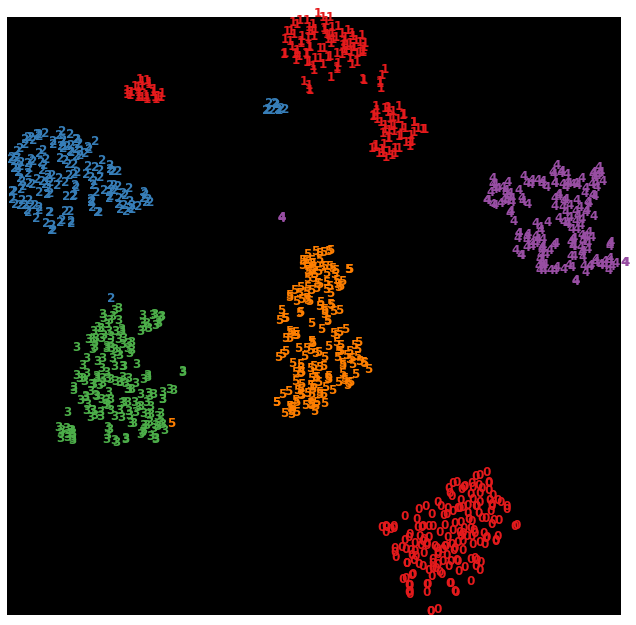

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 11))
plt.style.use("dark_background")

for i in range(X_scaled.shape[0]):

    plt.text(
        X_scaled[i, 0],
        X_scaled[i, 1],
        str(y[i]),
        color=plt.cm.Set1(y[i] / 10.0),
        fontdict={"weight": "bold", "size": 12},
    )


plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.show()